In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import calendar
import random

In [9]:
df = pd.read_csv('data.csv')

c:\users\sanch\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [11]:
df.shape

(107619, 9)

In [12]:
df.index

RangeIndex(start=0, stop=107619, step=1)

In [13]:
df.drop(['time_period','time_period_type'],axis = 1, inplace=True)

In [14]:
df

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0,cases


In [20]:
df.dtypes

report_date        datetime64[ns]
location                   object
location_type              object
data_field                 object
data_field_code            object
value                      object
unit                       object
dtype: object

In [16]:
df['report_date'] = pd.to_datetime(df['report_date'], errors = 'coerce', format = '%Y-%m-%d')

In [17]:
df['report_date'].isnull().value_counts()

False    107372
True        247
Name: report_date, dtype: int64

In [18]:
null_dates = df[df['report_date'].isnull()].index
null_dates

Int64Index([ 93193, 104239, 104240, 104241, 104246, 104247, 104248, 104407,
            104408, 104409,
            ...
            104647, 104648, 104649, 104650, 104651, 104652, 104653, 104654,
            104655, 104656],
           dtype='int64', length=247)

In [19]:
df['report_date'].isnull().value_counts(dropna=False)

False    107372
True        247
Name: report_date, dtype: int64

In [21]:
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [27]:
df['value'].isnull().value_counts()

False    107478
Name: value, dtype: int64

In [23]:
null_values = df[df['value'].isnull()].index

In [24]:
null_values

Int64Index([  2018,   2019,   2045,   2046,   2072,   2073,   2157,   2158,
              2184,   2185,
            ...
            100616, 100660, 100704, 101086, 104239, 104240, 104241, 104246,
            104247, 104248],
           dtype='int64', length=141)

In [26]:
df.drop(null_values,inplace=True)

In [28]:
df

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,0.0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0.0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9.0,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0.0,cases


### show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [29]:
df.query("data_field_code=='AR0005' & location == 'Argentina-Catamarca'")

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14.0,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16.0,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16.0,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15.0,cases


### Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference

In [30]:
arg_caba = df.query("unit =='cases' & location == 'Argentina-CABA'")
arg_cata = df.query("unit=='cases' & location == 'Argentina-Catamarca'")

In [31]:
a1 = arg_caba.groupby('report_date')['value'].agg('sum')
a2 = arg_cata.groupby('report_date')['value'].agg('sum')
a2

report_date
2016-03-19    14.0
2016-03-26    15.0
2016-04-02    15.0
2016-04-09    15.0
2016-04-16    15.0
2016-04-29    15.0
2016-05-07    16.0
2016-05-14    15.0
2016-05-22    16.0
2016-05-30    15.0
2016-06-06    15.0
2016-06-13    15.0
2016-06-18    15.0
2016-06-26    16.0
Name: value, dtype: float64

In [32]:
a1

report_date
2016-03-19     78.0
2016-03-26     92.0
2016-04-02     94.0
2016-04-09     97.0
2016-04-16     98.0
2016-04-29    101.0
2016-05-07    255.0
2016-05-14    126.0
2016-05-22    260.0
2016-05-30    132.0
2016-06-06    134.0
2016-06-13    136.0
2016-06-18    136.0
2016-06-26    160.0
Name: value, dtype: float64

In [33]:
new_df = pd.DataFrame([a1,a2], index = ['Argentina-CABA','Argentina-Catamarca']).T
new_df

,Argentina-CABA,Argentina-Catamarca
report_date,,
2016-03-19,78.0,14.0
2016-03-26,92.0,15.0
2016-04-02,94.0,15.0
2016-04-09,97.0,15.0
2016-04-16,98.0,15.0
2016-04-29,101.0,15.0
2016-05-07,255.0,16.0
2016-05-14,126.0,15.0
2016-05-22,260.0,16.0


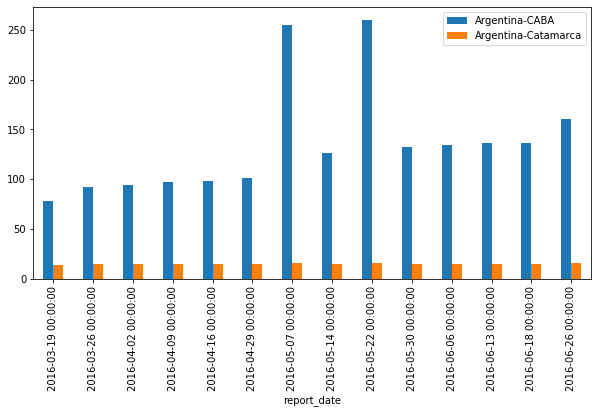

In [34]:
new_df.plot.bar()
plt.gcf().set_size_inches((10,5))

In [35]:
df

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,0.0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0.0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9.0,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0.0,cases


### Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [36]:
a_ba = df.query("location == 'Argentina-Buenos_Aires'")
a_caba = df.query("location == 'Argentina-CABA'")
a_cata = df.query("location == 'Argentina-Catamarca'")

In [37]:
a1 = a_ba.groupby('data_field')['value'].agg('sum')
a2 = a_caba.groupby('data_field')['value'].agg('sum')
a3 = a_cata.groupby('data_field')['value'].agg('sum')
a1

data_field
cumulative_cases_discarded              251.0
cumulative_cases_under_study           2981.0
cumulative_confirmed_imported_cases      32.0
cumulative_confirmed_local_cases          0.0
cumulative_probable_imported_cases       15.0
cumulative_probable_local_cases           0.0
Name: value, dtype: float64

In [38]:
a2

data_field
cumulative_cases_discarded               27.0
cumulative_cases_under_study           1748.0
cumulative_confirmed_imported_cases     124.0
cumulative_confirmed_local_cases          0.0
cumulative_probable_imported_cases        0.0
cumulative_probable_local_cases           0.0
Name: value, dtype: float64

In [39]:
a3

data_field
cumulative_cases_discarded               0.0
cumulative_cases_under_study           212.0
cumulative_confirmed_imported_cases      0.0
cumulative_confirmed_local_cases         0.0
cumulative_probable_imported_cases       0.0
cumulative_probable_local_cases          0.0
Name: value, dtype: float64

In [40]:
new_list1 = list(a1.values)
new_list2 = list(a2.values)
new_list3 = list(a3.values)


In [41]:
field_list = ['cumulative_cases_discarded ','cumulative_cases_under_study','cumulative_confirmed_imported_cases','cumulative_confirmed_local_cases','cumulative_probable_imported_cases','cumulative_probable_local_cases ']

In [42]:
field_list

['cumulative_cases_discarded ',
 'cumulative_cases_under_study',
 'cumulative_confirmed_imported_cases',
 'cumulative_confirmed_local_cases',
 'cumulative_probable_imported_cases',
 'cumulative_probable_local_cases ']

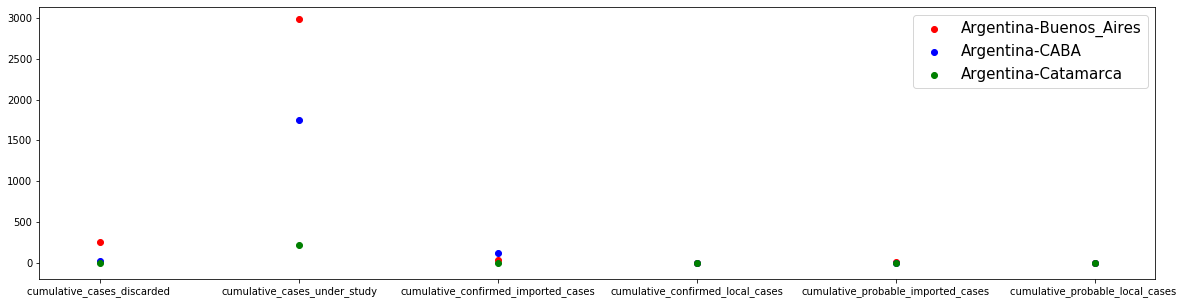

In [43]:
plt.scatter(x=field_list,y=new_list1,color = 'red')
plt.scatter(x=field_list,y=new_list2,color = 'blue')
plt.scatter(x=field_list,y=new_list3,color='green')
plt.gcf().set_size_inches((20,5))
plt.legend(['Argentina-Buenos_Aires','Argentina-CABA','Argentina-Catamarca'],fontsize = 15)

### Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [45]:
# pip install pyspellchecker

from spellchecker import SpellChecker
spell = SpellChecker(distance=1)
spell.word_frequency.load_text_file('big.txt')
ch = 'y'
while(ch == 'y' or ch =='Y'):
    word = input("\nEnter a word to check: ")
    corr = spell.correction(word)
    if word == corr:
        print("No Corrections made! Word: {}".format(word))
    else:
        print("Correct Word: {}".format(corr))
    ch = input("\nDo you want to continue(y/n)?")



Enter a word to check: gwod
Correct Word: good

Do you want to continue(y/n)?y

Enter a word to check: kild
Correct Word: kind

Do you want to continue(y/n)?y

Enter a word to check: whst
Correct Word: what

Do you want to continue(y/n)?n
